In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
df_wine=pd.read_csv('../wine.csv')
feat_labels=df_wine.columns[2:]
df_wine.head()

,Unnamed: 0,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12290ea90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123d66128>]], dtype=object)

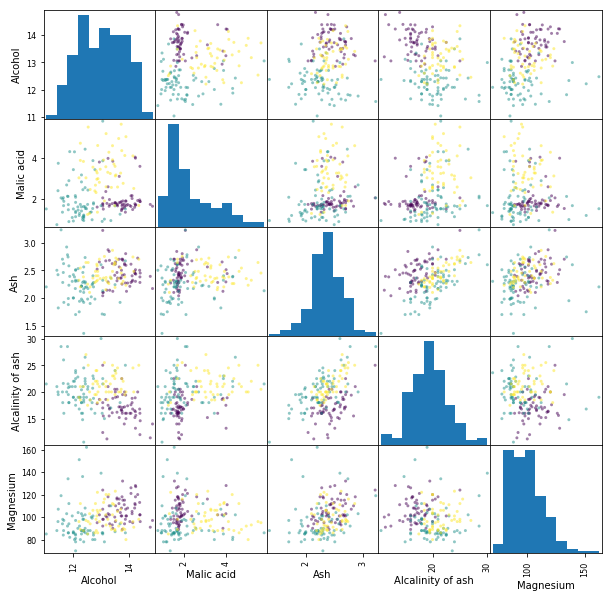

In [14]:
%matplotlib inline
y = df_wine.iloc[:,1].values
pd.plotting.scatter_matrix(df_wine.iloc[:,2:7],
                           c=y, figsize=(10,10))

In [12]:
df_wine.iloc[:,1].values

df_wine.iloc[10:20,3:5].values

array([[ 2.16,  2.3 ],
       [ 1.48,  2.32],
       [ 1.73,  2.41],
       [ 1.73,  2.39],
       [ 1.87,  2.38],
       [ 1.81,  2.7 ],
       [ 1.92,  2.72],
       [ 1.57,  2.62],
       [ 1.59,  2.48],
       [ 3.1 ,  2.56]])

In [15]:
from sklearn.model_selection import train_test_split

X,y=df_wine.iloc[:,2:].values,df_wine.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

forest=RandomForestClassifier(n_estimators=10000)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d) %-*s %f' %
          (f+1, 30, feat_labels[indices[f]],importances[indices[f]]))

 1) Proline                        0.178661
 2) Flavanoids                     0.150219
 3) Color intensity                0.143994
 4) Alcohol                        0.125092
 5) OD280/OD315 of diluted wines   0.118091
 6) Hue                            0.077650
 7) Total phenols                  0.047173
 8) Magnesium                      0.037133
 9) Malic acid                     0.033194
10) Alcalinity of ash              0.027521
11) Proanthocyanins                0.023638
12) Ash                            0.021393
13) Nonflavanoid phenols           0.016242


In [16]:
indices

array([12,  6,  9,  0, 11, 10,  5,  4,  1,  3,  8,  2,  7])

In [17]:
indices[:3]

array([12,  6,  9])

In [18]:
X[:,indices[:3]]

array([[  1.06500000e+03,   3.06000000e+00,   5.64000000e+00],
       [  1.05000000e+03,   2.76000000e+00,   4.38000000e+00],
       [  1.18500000e+03,   3.24000000e+00,   5.68000000e+00],
       [  1.48000000e+03,   3.49000000e+00,   7.80000000e+00],
       [  7.35000000e+02,   2.69000000e+00,   4.32000000e+00],
       [  1.45000000e+03,   3.39000000e+00,   6.75000000e+00],
       [  1.29000000e+03,   2.52000000e+00,   5.25000000e+00],
       [  1.29500000e+03,   2.51000000e+00,   5.05000000e+00],
       [  1.04500000e+03,   2.98000000e+00,   5.20000000e+00],
       [  1.04500000e+03,   3.15000000e+00,   7.22000000e+00],
       [  1.51000000e+03,   3.32000000e+00,   5.75000000e+00],
       [  1.28000000e+03,   2.43000000e+00,   5.00000000e+00],
       [  1.32000000e+03,   2.76000000e+00,   5.60000000e+00],
       [  1.15000000e+03,   3.69000000e+00,   5.40000000e+00],
       [  1.54700000e+03,   3.64000000e+00,   7.50000000e+00],
       [  1.31000000e+03,   2.91000000e+00,   7.3000000

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [20]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/sugakubunka/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>

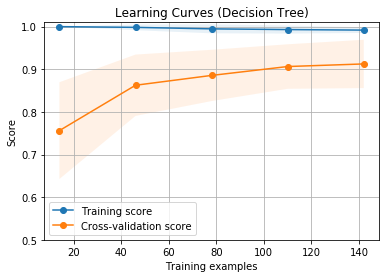

In [21]:
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Users/sugakubunka/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>

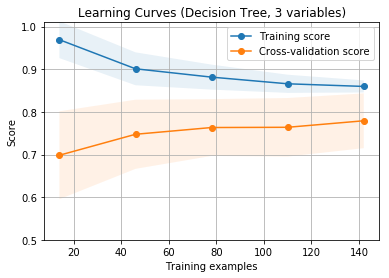

In [34]:
X_selected, y_selected = X[:,5:8], y
title = "Learning Curves (Decision Tree, 3 variables)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_learning_curve(estimator, title, X_selected, y_selected, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Users/sugakubunka/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>

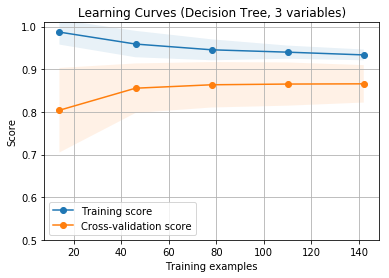

In [32]:
X_selected, y_selected = X[:,indices[:2]], y
title = "Learning Curves (Decision Tree, 3 variables)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_learning_curve(estimator, title, X_selected, y_selected, ylim=(0.5, 1.01), cv=cv, n_jobs=4)

(-3.1459632904844725,
 2.9506999770363094,
 -2.751510535923686,
 2.7700314264563786)

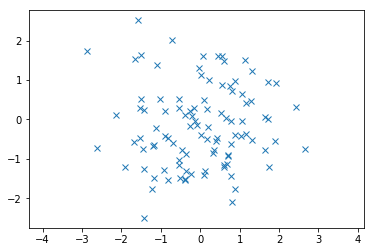

In [41]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
mean = [0, 0]
cov = [[1,0], [0,1]]
x, y = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x, y, 'x')
plt.axis('equal')

[ 0.54313244  0.45686756]


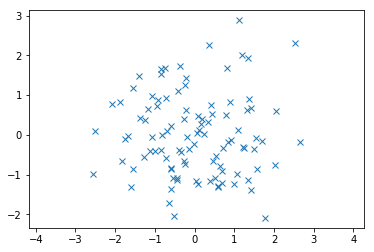

In [42]:
X=np.array([x,y]).transpose()
pca=PCA(n_components=2)
pca.fit(X)
X_r=pca.transform(X)
plt.plot(X_r[:,0], X_r[:,1], 'x')
plt.axis('equal')
print(pca.explained_variance_ratio_)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125639d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125c37240>]], dtype=object)

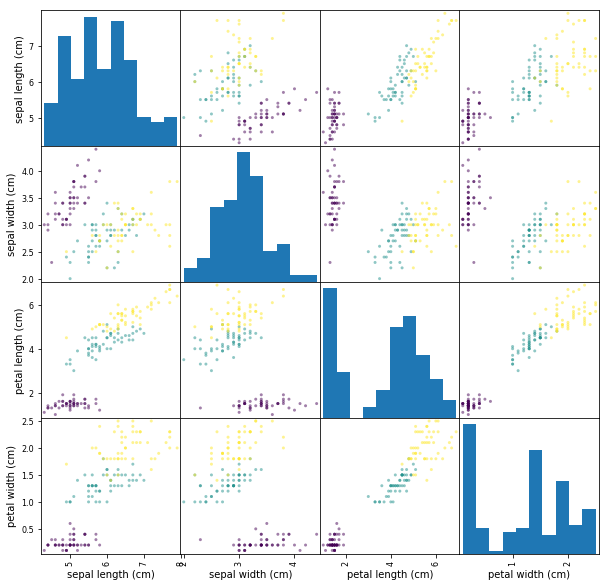

In [45]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
import pandas as pd
X = iris_dataset.data
y = iris_dataset.target
iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y, figsize=(10,10))

explained variance ratio (first two components): [ 0.92461621  0.05301557]


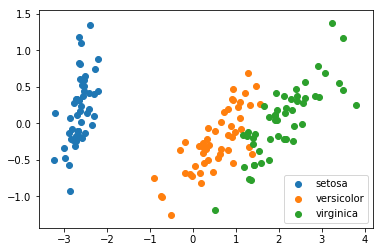

In [46]:
#http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

iris=datasets.load_iris()
X,y,target_names=iris.data,iris.target,iris.target_names
pca=PCA(n_components=2)
pca.fit(X)
X_r=pca.transform(X)

#Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for i in range(len(target_names)):
    plt.scatter(X_r[y==i,0],X_r[y==i,1],label=target_names[i])
plt.legend()

<module 'matplotlib.pyplot' from '/Users/sugakubunka/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/pyplot.py'>

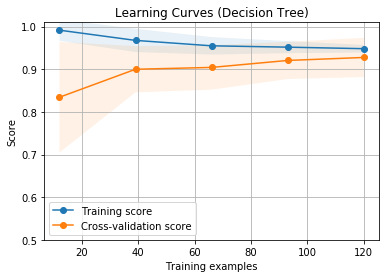

In [49]:
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3)
plot_learning_curve(estimator, title, X_r[:,:2], y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

In [ ]:
X_r[:,0]